In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
pd.set_option("max_columns", None)
import warnings
warnings.filterwarnings("ignore")
import time
import datetime
reviews = pd.read_csv("./Data/reviews.csv/reviews.csv")
listings = pd.read_csv("./Data/listings.csv/listings.csv")
summary_reviews = pd.read_csv("./Data/summary_reviews.csv")
summary_listings = pd.read_csv("./Data/summary_listings.csv")

In [2]:
new_reviews = pd.read_json(open("./Data/hongkong_listing_info/hongkong_listing_reviews.json", "r", encoding="utf8"))
new_listings = pd.read_json(open("./Data/hongkong_listing_info/hongkong_listing_details.json", "r", encoding="utf8"))

In [3]:
len(reviews)

262192

In [4]:
#new_reviews['review_rating'].values()

In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,https://www.airbnb.com/rooms/69074,20190920160325,2019-09-20,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"Filled with plants and art, this one bedroom u...",An ideal Hong location any visitor--hip withou...,none,"In the upper part of trendy, hip Sheung Wan, w...",NaN,Buses pass often along Hollywood Road and taxi...,"All access, except one section of the wardrobe.","If a guest is staying there, I am likely abroa...",Everything to make your stay as comfortable as...,NaN,NaN,https://a0.muscache.com/im/pictures/84364564/1...,NaN,160139,https://www.airbnb.com/users/show/160139,Amy,2010-07-07,Hong Kong,"I've been with AirBnB now for many years, ofte...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/160139/profil...,https://a0.muscache.com/im/users/160139/profil...,Sheung Wan,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Sheung Wan, Hong Kong",Sheung Wan,Central & Western,NaN,Sheung Wan,NaN,NaN,Hong Kong,"Sheung Wan, Hong Kong",HK,Hong Kong,22.28352,114.15018,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,"$1,409.00",NaN,"$29,750.00","$2,349.00",$313.00,2,$157.00,3,365,3,4,365,365,3.1,365.0,2 weeks ago,t,22,52,82,173,2019-09-20,132,21,2011-02-14,2019-09-05,97.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.26
1,101765,https://www.airbnb.com/rooms/101765,20190920160325,2019-09-20,Lamma Island flat 2min walk from the beach!,"My place is close to Beaches, great little sho...",Entire home with single firm bed and a closet ...,"My place is close to Beaches, great little sho...",none,Lamma Island is known as Hippie Island. The re...,The village house is about a 15min walk from t...,Bike or foot. Ferries go to either Central or ...,"Guests have access to the private bedroom, a b...",Happy to answer any questions about the area a...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/f4365155-7...,NaN,532909,https://www.airbnb.com/users/show/532909,Michael,2011-04-25,"Islands District, New Territories, Hong Kong",Hello there! I discovered this site through so...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/pictures/user/7a121...,https://

In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,https://www.airbnb.com/rooms/69074,20190920160325,2019-09-20,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"Filled with plants and art, this one bedroom u...",An ideal Hong location any visitor--hip withou...,none,"In the upper part of trendy, hip Sheung Wan, w...",NaN,Buses pass often along Hollywood Road and taxi...,"All access, except one section of the wardrobe.","If a guest is staying there, I am likely abroa...",Everything to make your stay as comfortable as...,NaN,NaN,https://a0.muscache.com/im/pictures/84364564/1...,NaN,160139,https://www.airbnb.com/users/show/160139,Amy,2010-07-07,Hong Kong,"I've been with AirBnB now for many years, ofte...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/160139/profil...,https://a0.muscache.com/im/users/160139/profil...,Sheung Wan,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Sheung Wan, Hong Kong",Sheung Wan,Central & Western,NaN,Sheung Wan,NaN,NaN,Hong Kong,"Sheung Wan, Hong Kong",HK,Hong Kong,22.28352,114.15018,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,"$1,409.00",NaN,"$29,750.00","$2,349.00",$313.00,2,$157.00,3,365,3,4,365,365,3.1,365.0,2 weeks ago,t,22,52,82,173,2019-09-20,132,21,2011-02-14,2019-09-05,97.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.26
1,101765,https://www.airbnb.com/rooms/101765,20190920160325,2019-09-20,Lamma Island flat 2min walk from the beach!,"My place is close to Beaches, great little sho...",Entire home with single firm bed and a closet ...,"My place is close to Beaches, great little sho...",none,Lamma Island is known as Hippie Island. The re...,The village house is about a 15min walk from t...,Bike or foot. Ferries go to either Central or ...,"Guests have access to the private bedroom, a b...",Happy to answer any questions about the area a...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/f4365155-7...,NaN,532909,https://www.airbnb.com/users/show/532909,Michael,2011-04-25,"Islands District, New Territories, Hong Kong",Hello there! I discovered this site through so...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/pictures/user/7a121...,https://

In [7]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...
1,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy..."
2,69074,400484,2011-07-27,696753,Michael,I stayed in this Apt for about 12 days. Such a...
3,69074,411022,2011-08-01,40901,Donna,"Amy's cute, comfortable apartment is in the he..."
4,69074,497498,2011-09-03,341618,Melissa,Amy was the perfect host - extremely communica...


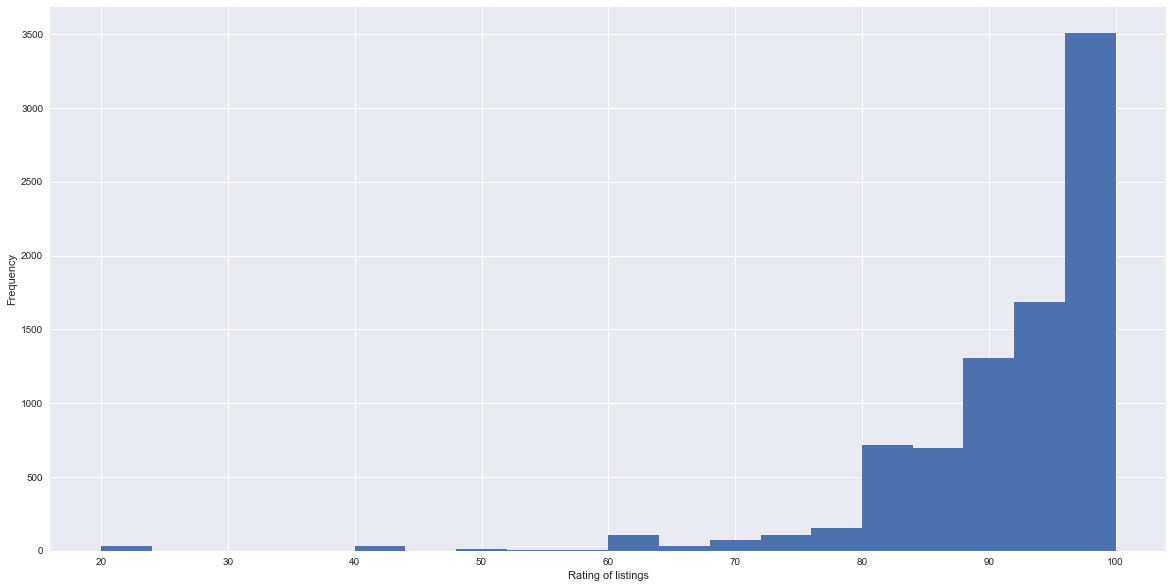

In [8]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(listings['review_scores_rating'], bins=20)
plt.xlabel('Rating of listings')
plt.ylabel('Frequency');

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in reviews['comments'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Lovely apartment in a great location that quickly felt like home. It is always much more pleasant to return to homey apt than an anonymous hotel room. Amy is also quick to respond and a pleasure to correspond with.
compound: 0.9565, neg: 0.0, neu: 0.644, pos: 0.356, 
As a former resident of HK, I can say that Amy's flat is really a great flat that is a great example of Hong Kong homes in this area.  The neighborhood is very convenient for visitors to HK and also has a lot of charm and history (steps away from the British landing spot for colonial HK).

And I must mention that Amy was a great "non-present" host as she has thought of everything and made a lot of provisions for the comfort of guests that would not have been included or even thought of by others.  Not to mention that the apartment is spotless and well kept.  
compound: 0.966, neg: 0.0, neu: 0.821, pos: 0.179, 
I stayed in this Apt for about 12 days. Such an amazing place. Right in the heart of everything. I had no problems

In [10]:

from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [11]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r)]

In [12]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

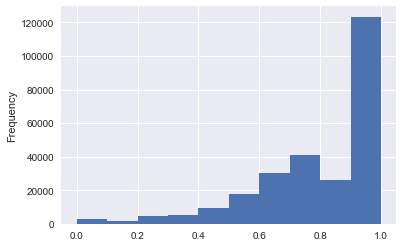

In [13]:
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

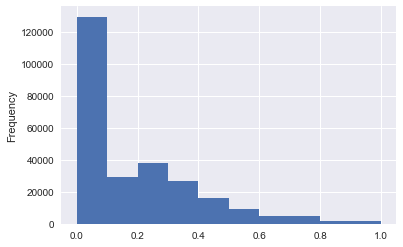

In [14]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

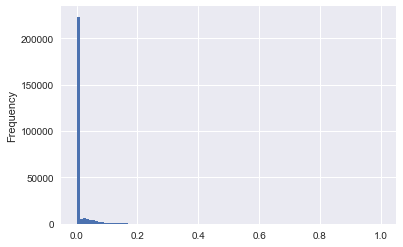

In [15]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)

In [16]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f]
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]

In [17]:
scored_reviews.head()

,review,compound,negativity,neutrality,positivity
0,Lovely apartment in a great location that quic...,0.9565,0.000,0.644,0.356
1,"As a former resident of HK, I can say that Amy...",0.9660,0.000,0.821,0.179
2,I stayed in this Apt for about 12 days. Such a...,0.6996,0.075,0.778,0.148
3,"Amy's cute, comfortable apartment is in the he...",0.9665,0.000,0.546,0.454
4,Amy was the perfect host - extremely communica...,0.9601,0.000,0.629,0.371


In [18]:
scored_reviews.query('negativity > positivity').query('negativity > 0.1')

,review,compound,negativity,neutrality,positivity
172,The room is ok but the apartment got no lift. ...,-0.6956,0.255,0.681,0.064
288,Our stay in Brend's flat was really awful! The...,-0.9305,0.198,0.734,0.068
360,"The apartment is in a good location, however t...",-0.8178,0.161,0.737,0.102
416,Beware! False advertising of address and Brend...,-0.9767,0.132,0.805,0.063
493,uns hat es in dem apartment sehr gut gefallen....,-0.9867,0.213,0.764,0.023
538,We had a very convenient stay here. The apartm...,-0.7140,0.113,0.866,0.021
696,Good:\r\n+ Location\r\n+ Air condition \r\n+ G...,-0.8576,0.159,0.763,0.077
765,My friends and I had a terrible experience at ...,-0.1556,0.119,0.788,0.093
768,We were very disappointed. 1) We call Brendan ...,-0.9361,0.131,0.784,0.085
803,Brend was quick to respond to any queries. The...,-0.7933,0.171,0.795,0.034


In [19]:
scored_reviews.query('negativity > positivity').query('compound < -0.2')

,review,compound,negativity,neutrality,positivity
172,The room is ok but the apartment got no lift. ...,-0.6956,0.255,0.681,0.064
288,Our stay in Brend's flat was really awful! The...,-0.9305,0.198,0.734,0.068
308,The apartment is spacious considering a lot of...,-0.2047,0.062,0.884,0.053
358,I was a little irritated that Brend charged me...,-0.6437,0.082,0.871,0.047
360,"The apartment is in a good location, however t...",-0.8178,0.161,0.737,0.102
396,The apartment is in a great location and you'r...,-0.3946,0.058,0.889,0.053
416,Beware! False advertising of address and Brend...,-0.9767,0.132,0.805,0.063
420,We have been 5 days in this apartment with 2 ...,-0.3612,0.063,0.877,0.060
473,really disappointed with this apartment. It's...,-0.6708,0.092,0.908,0.000
493,uns hat es in dem apartment sehr gut gefallen....,-0.9867,0.213,0.764,0.023


In [20]:
scored_reviews.iloc[688]['review']

'Robin made us feel right at home! She helped us find the place, left a nice gift, great instructions and a guide on the local area, and provided all the little things that are hard to bring with you while traveling.\r\n\r\nI grew up in Hong Kong years ago, so it was nice being able to slip into a comfortable environment while visiting my family.\r\n\r\nI highly recommend Robin as a great host and the location and comfort of her place :)'

In [21]:
df = pd.merge(reviews, listings[['neighbourhood_cleansed', 'host_id', 'latitude',
                          'longitude', 'number_of_reviews', 'id', 'property_type']], 
              left_on='listing_id', right_on='id', how='left')
df.drop(['id_y'], axis=1, inplace=True)

In [22]:
df.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,neighbourhood_cleansed,host_id,latitude,longitude,number_of_reviews,property_type
0,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...,Central & Western,160139,22.28352,114.15018,132,Apartment
1,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy...",Central & Western,160139,22.28352,114.15018,132,Apartment
2,69074,400484,2011-07-27,696753,Michael,I stayed in this Apt for about 12 days. Such a...,Central & Western,160139,22.28352,114.15018,132,Apartment
3,69074,411022,2011-08-01,40901,Donna,"Amy's cute, comfortable apartment is in the he...",Central & Western,160139,22.28352,114.15018,132,Apartment
4,69074,497498,2011-09-03,341618,Melissa,Amy was the perfect host - extremely communica...,Central & Western,160139,22.28352,114.15018,132,Apartment


In [23]:
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 262192 rows and 12 columns.


In [24]:
# group by hosts and count the number of unique listings --> cast it to a dataframe
properties_per_host = pd.DataFrame(df.groupby('host_id')['listing_id'].nunique())

# sort unique values descending and show the Top20
properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head(20)

,listing_id
host_id,
122131447,78
2767794,49
30098437,47
24215902,45
182150019,44
31113999,43
24358640,41
14861546,38
135784037,34


In [25]:
top1_host = df.host_id == 122131447
df[top1_host].neighbourhood_cleansed.value_counts()

pd.DataFrame(df[top1_host].groupby('neighbourhood_cleansed')['listing_id'].nunique())

,listing_id
neighbourhood_cleansed,
Kowloon City,16
Yau Tsim Mong,62


In [26]:
pd.DataFrame(df[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Apartment,27
Condominium,12
Serviced apartment,39


In [27]:
top2_host = df.host_id == 30098437
df[top2_host].neighbourhood_cleansed.value_counts()

pd.DataFrame(df[top2_host].groupby('neighbourhood_cleansed')['listing_id'].nunique())

,listing_id
neighbourhood_cleansed,
Yau Tsim Mong,47


In [28]:
pd.DataFrame(df[top2_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Apartment,31
Bed and breakfast,5
Condominium,3
Guesthouse,8


In [29]:
top3_host = df.host_id == 31113999
df[top3_host].neighbourhood_cleansed.value_counts()

pd.DataFrame(df[top3_host].groupby('neighbourhood_cleansed')['listing_id'].nunique())

,listing_id
neighbourhood_cleansed,
Yau Tsim Mong,43


In [30]:
pd.DataFrame(df[top3_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Apartment,1
Hostel,1
Hotel,41


In [31]:
df.isna().sum()

listing_id                  0
id_x                        0
date                        0
reviewer_id                 0
reviewer_name               2
comments                  174
neighbourhood_cleansed      0
host_id                     0
latitude                    0
longitude                   0
number_of_reviews           0
property_type               0
dtype: int64

In [32]:
df.dropna(inplace=True)
df.isna().sum()

listing_id                0
id_x                      0
date                      0
reviewer_id               0
reviewer_name             0
comments                  0
neighbourhood_cleansed    0
host_id                   0
latitude                  0
longitude                 0
number_of_reviews         0
property_type             0
dtype: int64

In [33]:
from langdetect import detect

In [34]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [35]:
%%time
df['language'] = df['comments'].apply(language_detection)

Wall time: 19min 30s


In [36]:
df.language.value_counts().head(10)

en       142109
zh-cn     69006
ko        38957
fr         1742
zh-tw      1361
ja         1360
so          981
ro          945
de          706
es          600
Name: language, dtype: int64

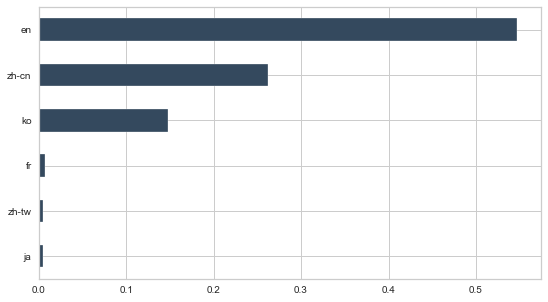

In [178]:
ax = df.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));

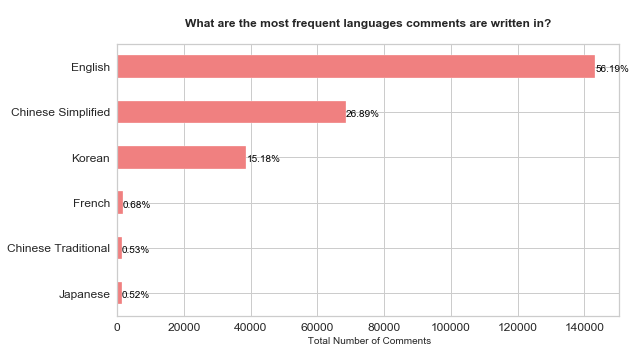

In [179]:
# visualizing the comments' languages b) neat and clean
ax = df.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'Chinese Simplified', 'Korean', 'French', 'Chinese Traditional', 'Japanese'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()

In [180]:
# splitting the dataframes in language related sub-dataframes
df_eng = df[(df['language']=='en')]
df_de  = df[(df['language']=='zh-cn')]
df_fr  = df[(df['language']=='ko')]

In [181]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [182]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

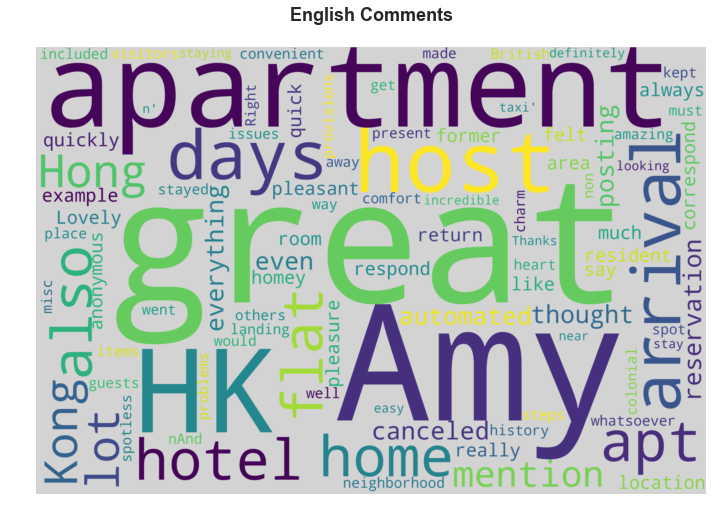

In [183]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_eng.comments.values))

plot_wordcloud(wordcloud, 'English')

In [184]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [185]:
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [186]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [187]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [188]:
%%time

df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

Wall time: 5min 18s


In [189]:
df = df_eng

In [190]:
df.head(2)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,neighbourhood_cleansed,host_id,latitude,longitude,number_of_reviews,property_type,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...,Central & Western,160139,22.28352,114.15018,130,Apartment,en,0.0,0.644,0.356,0.9565
1,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy...",Central & Western,160139,22.28352,114.15018,130,Apartment,en,0.0,0.821,0.179,0.9660


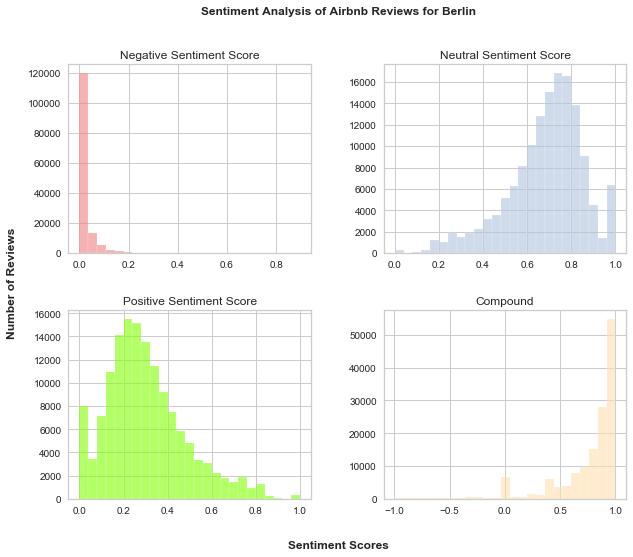

In [191]:


# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for Hong Kong\n\n', fontsize=12, fontweight='bold');

In [192]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    143294.000000
mean          0.746274
std           0.327840
min          -0.996500
5%            0.000000
10%           0.361200
20%           0.621820
30%           0.742500
40%           0.826800
50%           0.877900
60%           0.914600
70%           0.940410
80%           0.960600
90%           0.977100
max           0.999500
Name: sentiment_compound, dtype: float64

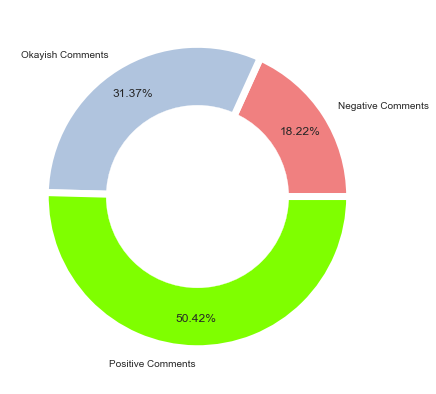

In [193]:
# assign the data
neg = percentiles['10%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [194]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [195]:
# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

In [196]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

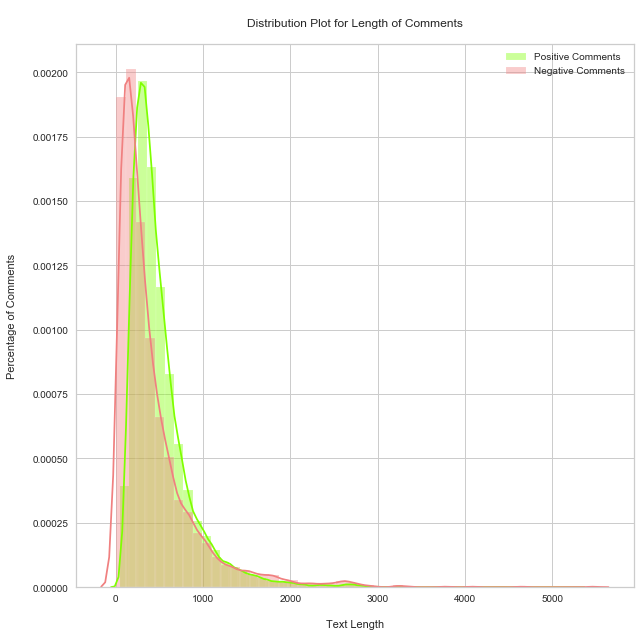

In [197]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

In [198]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

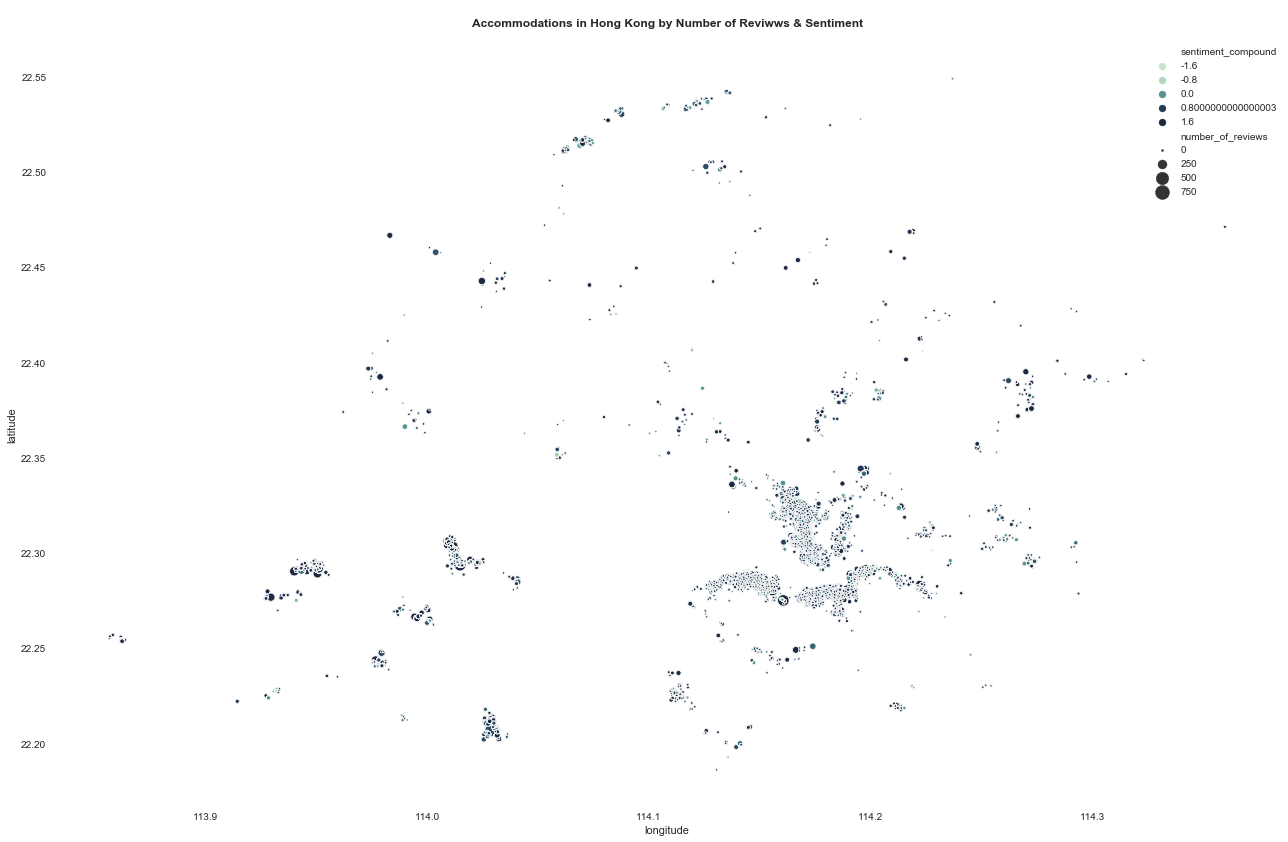

In [111]:
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
fig, ax = plt.subplots(figsize=(22,14))

ax = sns.scatterplot(x="longitude", y="latitude", size='number_of_reviews', sizes=(5, 200),
                     hue='sentiment_compound', palette=cmap,  data=df)
ax.legend(bbox_to_anchor=(1, 1), borderaxespad=0.)
plt.title('\nAccommodations in Hong Kong by Number of Reviwws & Sentiment\n', fontsize=12, fontweight='bold')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

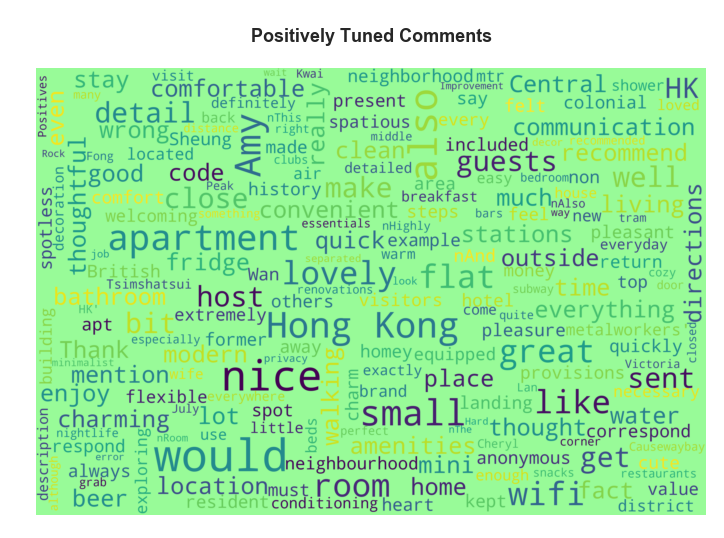

In [112]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="palegreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

In [114]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

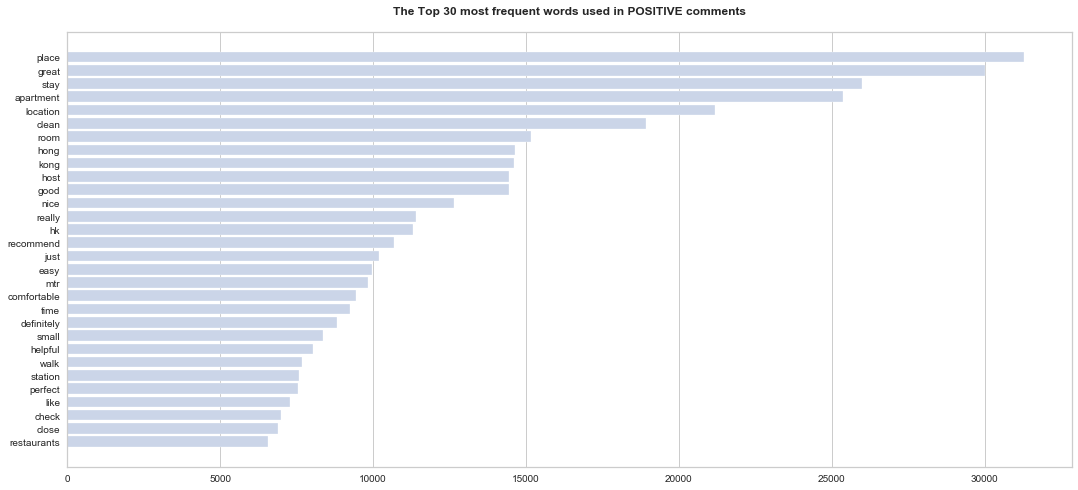

In [115]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

In [116]:
# importing libraries
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [117]:
# prepare the preprocessing
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [119]:
# removing stopwords, punctuations and normalizing the corpus
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(comment).split() for comment in pos_comments]

In [147]:
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]
# uncomment the code if working locally
pickle.dump(corpus, open('./Data/sentimentData/corpus.pkl', 'wb'))
dictionary.save('./Data/sentimentData/dictionary.gensim')

In [148]:
import gensim

#  10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# uncomment the code if working locally
ldamodel.save('./Data/sentimentData/model5.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.019*"room" + 0.010*"place" + 0.008*"stay" + 0.008*"night"')
(1, '0.023*"location" + 0.021*"place" + 0.019*"good" + 0.012*"room"')
(2, '0.015*"la" + 0.011*"room" + 0.007*"de" + 0.005*"pa"')
(3, '0.020*"room" + 0.012*"place" + 0.011*"bed" + 0.010*"apartment"')
(4, '0.019*"place" + 0.016*"host" + 0.011*"u" + 0.009*"check"')


In [149]:
dictionary = gensim.corpora.Dictionary.load('./Data/sentimentData/dictionary.gensim')
corpus = pickle.load(open('./Data/sentimentData/corpus.pkl', 'rb'))

import pyLDAvis.gensim

In [151]:
# visualizing 5 topics
lda = gensim.models.ldamodel.LdaModel.load('./Data/sentimentData/model5.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

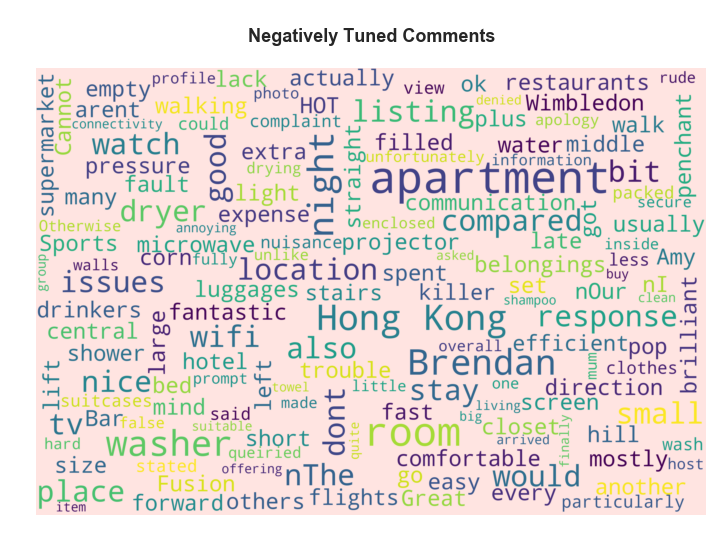

In [129]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="mistyrose",
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned')

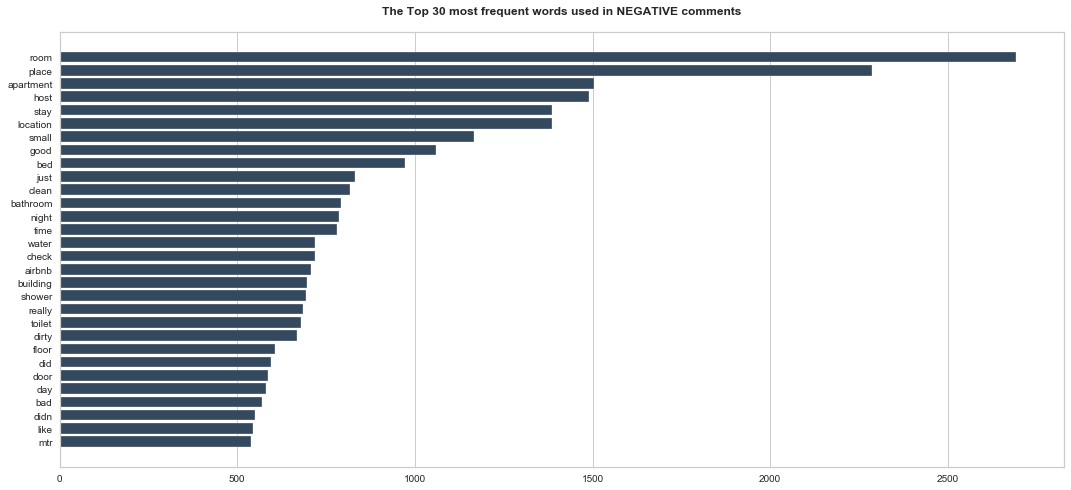

In [130]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('flatui')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

In [131]:
# calling the cleaning function we defined earlier
doc_clean = [clean(comment).split() for comment in neg_comments]

In [143]:
# create a dictionary from the normalized data, convert this to a bag-of-words corpus
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

import pickle
# save for later use
# uncomment the code if working locally
pickle.dump(corpus, open('./Data/sentimentData/corpus_neg.pkl', 'wb'))
dictionary.save('./Data/sentimentData/dictionary_neg.gensim')

In [144]:
# and finally 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# uncomment the code if working locally
ldamodel.save('./Data/sentimentData/model10_neg.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.013*"u" + 0.012*"host" + 0.011*"room" + 0.009*"place"')
(1, '0.014*"la" + 0.008*"room" + 0.006*"de" + 0.005*"не"')
(2, '0.018*"place" + 0.017*"room" + 0.017*"bed" + 0.011*"small"')
(3, '0.012*"stay" + 0.011*"apartment" + 0.007*"floor" + 0.006*"place"')
(4, '0.027*"room" + 0.022*"place" + 0.016*"location" + 0.013*"good"')


In [145]:
dictionary = gensim.corpora.Dictionary.load('./Data/sentimentData/dictionary_neg.gensim')
corpus = pickle.load(open('./Data/sentimentData/corpus_neg.pkl', 'rb'))

In [146]:
# visualizing 5 topics
lda = gensim.models.ldamodel.LdaModel.load('./Data/sentimentData/model10_neg.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)